<a href="https://colab.research.google.com/github/Spookytober/Datascience/blob/main/Aubr_OrfU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 3 Project: The Right Likelihood for the Job

**Task**:

Two parts:

1. Propose a data set that's compatible with a single variable likelihood from pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror, and NONE of your priors can be a beta distribtuion
- Your likelihood CANNOT be a Bernoulli distribution nor a Binomial distribution.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit3NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


In [ ]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 404.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=

In [ ]:
import preliz as pz
import numpy as np
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Shaking a Tail Feather
My project's goal was to find the average tail length of Northern Cardinal (*Cardinalis cardinalis*) in Northern states. My dataset took a long time to gather, and my ideas changed a few times, but I finally landed on this: a comprehensive survey of 261 Cardinal tail lengths in New York and Ohio. All of the measurements are in millimeters.

In [ ]:
data_taillength = pd.read_csv('https://raw.githubusercontent.com/Spookytober/Datascience/refs/heads/main/taillength',header = 0)
data_taillength

,Tail_Length
0,102.0
1,102.0
2,100.0
3,104.0
4,105.0
...,...
257,95.0
258,106.0
259,95.0
260,95.0


(array([ 4.,  7., 17., 14., 64., 38., 64., 24., 24.,  6.]),
 array([ 88. ,  90.5,  93. ,  95.5,  98. , 100.5, 103. , 105.5, 108. ,
        110.5, 113. ]),
 <BarContainer object of 10 artists>)

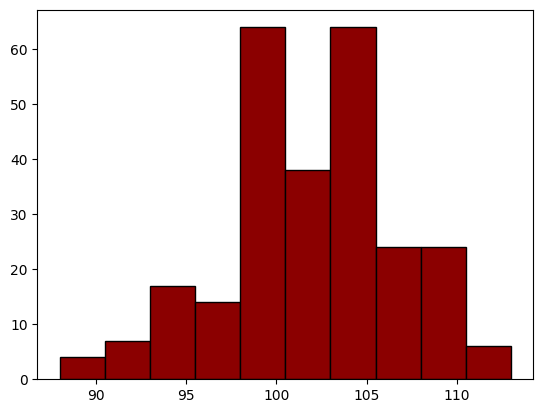

In [ ]:
plt.hist(data_taillength, color = 'darkred', edgecolor = 'black')

After plotting this data on a histogram, I realized that it looked kind of like a normal distribution. I used the mean of the data to determine mu, and since the graph looked like most of its data was within 12 of the mean, I let sigma be 6, meaning 95% of data would be between 90mm and 114mm.

<Axes: >

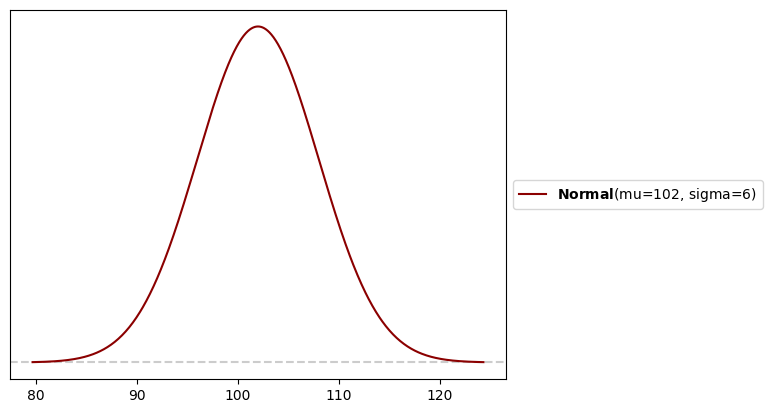

In [ ]:
pz.Normal(mu = 102, sigma = 6).plot_pdf(color = 'darkred')

**Time to check and see if my normal distribution actually modeled my data well.**

I'm going to test using a posterior predictive check. Because the normal distrubtion has no kurtosis or skew, I only have to worry about checking 2 moments.

I'm going to use another normal distribution to display the mean, saying that the mean of all tail lengths is around 102mm. I've seen a lot of Cardinals thanks to taking Planet Earth last semester, and that seems about accurate. However, I do not know what the mean really is, and only know that it could reasonably be anywhere between 100 and 104, so a normal distribution covering that range is a reasonable prior.


For variance, I'm using a half normal with the same sigma of 6 as my data shows.

<Axes: >

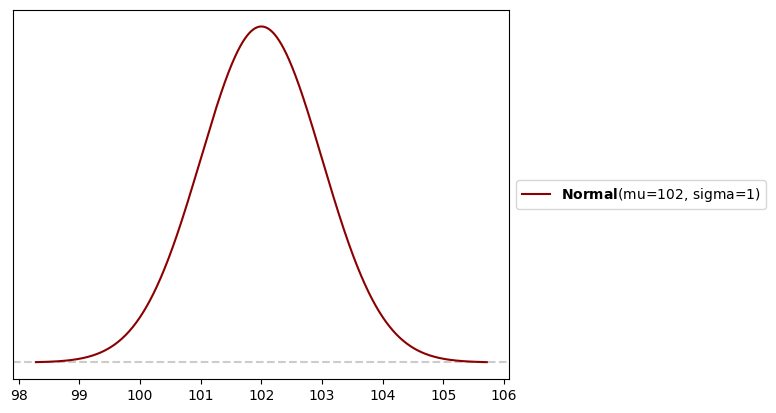

In [ ]:
pz.Normal(mu = 102, sigma = 1).plot_pdf(color = 'darkred')

This prior shows the **mean**. I believe the average taillength is around 102mm, but it *could* reaonably be anywhere from 100 to 104.

<Axes: >

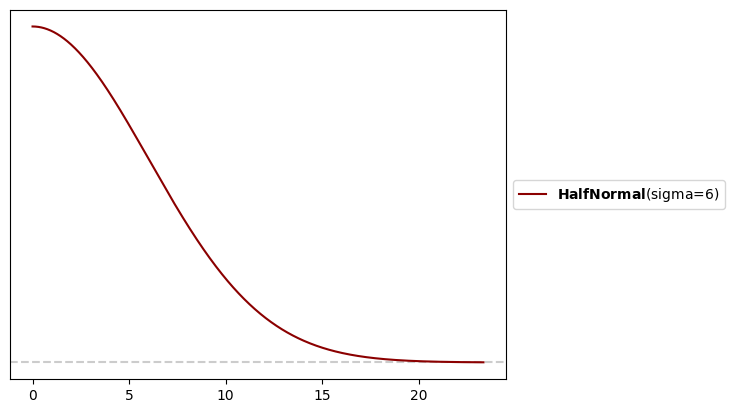

In [ ]:
pz.HalfNormal(sigma = 6).plot_pdf(color = 'darkred')

This prior shows the **variance**. As mentioned earlier when choosing my likelihood, I noted that the data varied by about 12mm on either side of the mean, give or take a couple of data points. Choosing a sigma value of 6 for a plot of the variance means that most data is within 12 millimeters of the mean.

In [ ]:
with pm.Model() as model_taillengthN:
    μ = pm.Normal('μ', mu = 102, sigma = 1)
    σ = pm.HalfNormal('σ', sigma=6)
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed = data_taillength)
    idata_taillengthN = pm.sample()

Output()

Output()

Time to put my original likelihood into a posterior predictive check! This is very similar to what we did in the notes.

In [ ]:
pm.sample_posterior_predictive(idata_taillengthN, model=model_taillengthN, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

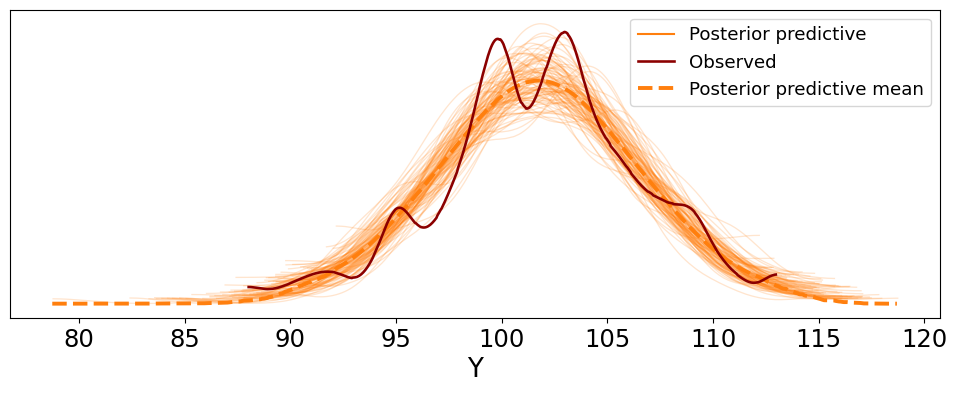

In [ ]:
az.plot_ppc(idata_taillengthN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "darkred", "C1"])

My first attempt at creating a likelihood was largely successful. The posterior predictive check matched with my observed data really well. My observed data is a bit rougher than the predictive as can be seen with the dips, but if you follow the general shape of it, it matches with my posterior predictive.

Regarding the roughness and dips in my observed data, I believe that is merely a product of not having enough data. If more data were to be collected, I think that the curve created by the observed would more closely resemble a Normal distribution.